# Explanatory graphs

In [18]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

from aposteriori import ndfu


TITLE_SIZE = 20
LABEL_SIZE = 16
LESSER_LABEL_SIZE = 14
GRAPH_DIR = Path("./graphs")
sns.set_theme(style="whitegrid")
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})
np.random.seed(seed=42)

In [19]:
def save_plot(path: Path) -> None:
    """
    Saves a plot to the specified filepath.

    :param path: The full path (including filename) where the plot will be saved.
    :type path: pathlib.Path
    """
    path.parent.mkdir(parents=True, exist_ok=True)
    plt.savefig(path, bbox_inches="tight")
    print(f"Figure saved to {path.resolve()}")


def truncated_normal(loc, scale, lower=0, upper=10, size=100):
    a, b = (lower - loc) / scale, (upper - loc) / scale
    return scipy.stats.truncnorm(a, b, loc=loc, scale=scale).rvs(size)

## Intuition

In [20]:
colors = sns.color_palette()
bins = 10
d1_mean = 2
d2_mean = 6

In [21]:
INTUITION_SIZE = 50
d1 = truncated_normal(loc=d1_mean, scale=1.3, size=INTUITION_SIZE)
d2 = truncated_normal(loc=d2_mean, scale=1.3, size=INTUITION_SIZE)
d_union = np.hstack([d1, d2])

n_d1 = ndfu(d1, bins=bins)
n_d2 = ndfu(d2, bins=bins)
n_union = ndfu(d_union, bins=bins)
ndfus = [n_d1, n_d2, n_union]

x_values = [2, 5, 8]
y_values = [0.4]*3

Figure saved to /home/dimits/Documents/research/aposteriori-unimodality/graphs/ndfu_single_comment.png


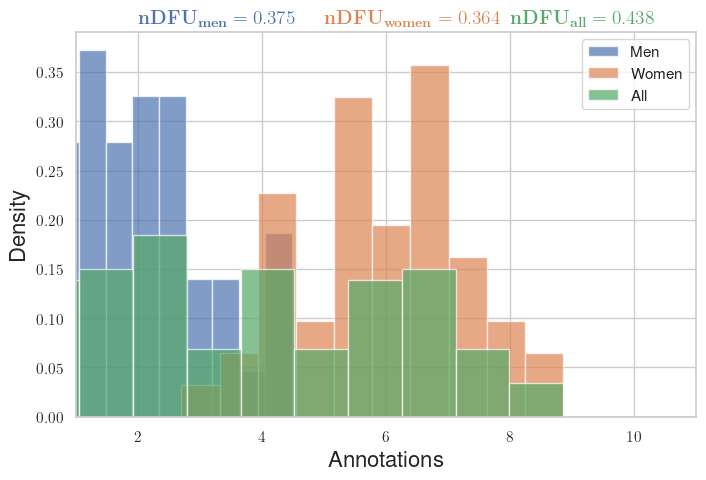

In [22]:
plt.figure(figsize=(8, 5))
plt.hist(
    d1,
    bins=bins,
    density=True,
    alpha=0.7,
    color=colors[0],
    label="Men",
)
plt.hist(
    d2,
    bins=bins,
    density=True,
    alpha=0.7,
    color=colors[1],
    label="Women",
)
plt.hist(
    d_union,
    bins=bins,
    density=True,
    alpha=0.7,
    color=colors[2],
    label="All",
)

type_strs = ["men", "women", "all"]
for pos, val, color, ndfu_value, type_str in zip(x_values, y_values, colors, ndfus, type_strs):
    text = f"$\mathbf{{nDFU_{{{type_str}}}}}={ndfu_value:.3f}$"
    plt.text(pos, val, text, color=color, weight="bold", fontsize=LESSER_LABEL_SIZE)


plt.xlim(1, 11)
plt.legend()
plt.xlabel("Annotations", fontsize=LABEL_SIZE)
plt.ylabel("Density", fontsize=LABEL_SIZE)

save_plot(GRAPH_DIR / "ndfu_single_comment.png")
plt.show()

## Why comment-level?

In [23]:
DIFF_COMMENTS_SIZE = 400
d_woman_comment1 = truncated_normal(loc=d2_mean, scale=1.3, size=DIFF_COMMENTS_SIZE)
d_woman_comment2 = truncated_normal(loc=d1_mean, scale=1.3, size=DIFF_COMMENTS_SIZE)

d_man_comment1 = truncated_normal(loc=d1_mean, scale=1.3, size=DIFF_COMMENTS_SIZE)
d_man_comment2 = truncated_normal(loc=d2_mean, scale=1.3, size=DIFF_COMMENTS_SIZE)

d_woman = np.hstack([d_woman_comment1, d_woman_comment2])
d_man = np.hstack([d_man_comment1, d_man_comment2])

Figure saved to /home/dimits/Documents/research/aposteriori-unimodality/graphs/ndfu_multi_comments.png


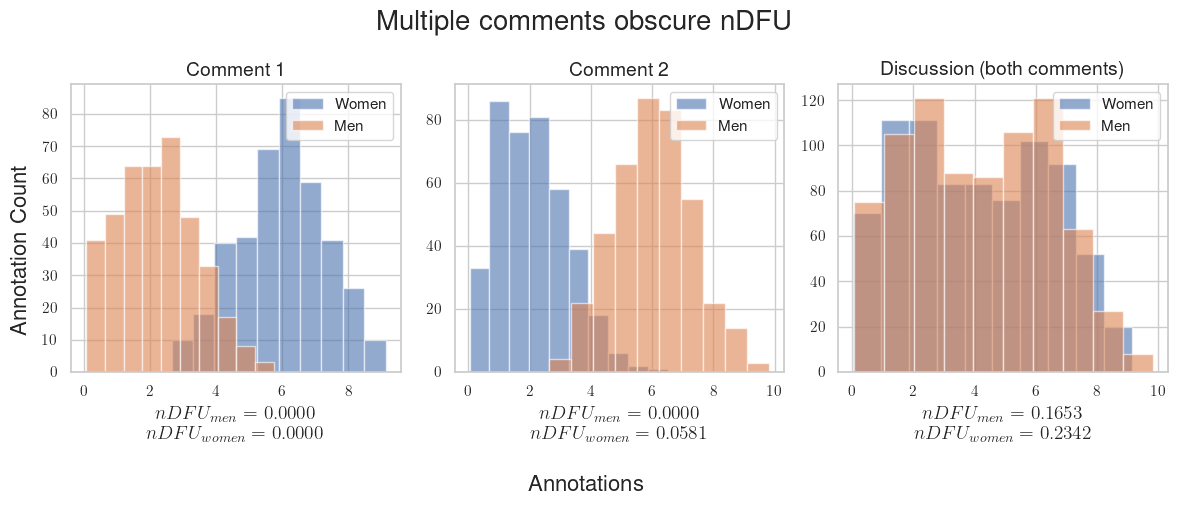

In [28]:
def plot_example(title: str, women_annot: list[float], men_annot: list[float], bins: int, ax):
    ndfu_man = ndfu(men_annot, bins=bins)
    ndfu_woman = ndfu(women_annot, bins=bins)

    ax.hist(women_annot, bins=bins, alpha=0.6, label="Women")
    ax.hist(men_annot, bins=bins, alpha=0.6, label="Men")
    ax.set_title(title, fontsize=LESSER_LABEL_SIZE)
    ax.legend(loc="upper right")
    ax.set_xlabel(
        f"$nDFU_{{men}}={ndfu_man:.4f}$\n$nDFU_{{women}}={ndfu_woman:.4f}$",
        fontsize=LESSER_LABEL_SIZE,
    )

fig, axs = plt.subplots(1, 3, figsize=(12, 5), tight_layout=True)

plot_example("Comment 1", d_woman_comment1, d_man_comment1, bins, axs[0])
plot_example("Comment 2", d_woman_comment2, d_man_comment2, bins, axs[1])
plot_example("Discussion (both comments)", d_woman, d_man, bins, axs[2])

fig.suptitle("Multiple comments obscure nDFU", fontsize=TITLE_SIZE)
fig.supxlabel("Annotations", fontsize=LABEL_SIZE)
fig.supylabel("Annotation Count", fontsize=LABEL_SIZE)
save_plot(GRAPH_DIR / "ndfu_multi_comments.png")
plt.show()